In [10]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

#for presenting maximum columns
pd.set_option('display.max_columns',None)

In [11]:
#loading dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [12]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
#checking shape of the dataset
df.shape

(32560, 15)

In [14]:
#checking the dtype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# checking value counts and unique value in each columns¶

In [15]:
#checking value count and unique value in each column
count=1
for x in df:
    print(f'{count}.{x}:{df[x].unique()}')
    print(f'{df[x].value_counts()}',end='\n\n\n')
    count+=1

1.Age:[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


2.Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


3.Fnlwgt:[ 83311 215646 234721 ...  34066  84661 257302]
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fn

In [16]:
#describing the data to check std dev and outliers
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Documentation :
    
    - the data is having no mising value 
    
    -in the fnlwgt column the data is in exponential form 
    
    -and in age capotal_gain,capital_loss,and hours_per_week  skewness is too high so we removed them with power transform method
    
    -outliers is also present in the column so we can remove that by zscore or outlier detection formula 

# checking null values

In [17]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [18]:
df.isnull().values.any()

False

<AxesSubplot:>

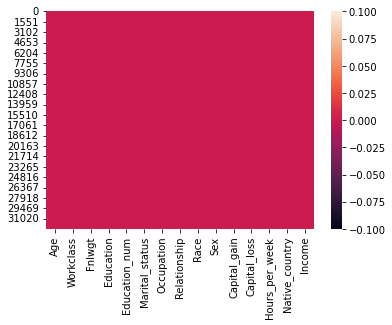

In [19]:
sns.heatmap(df.isnull())

No null values are present in the dataset

# checking target variable

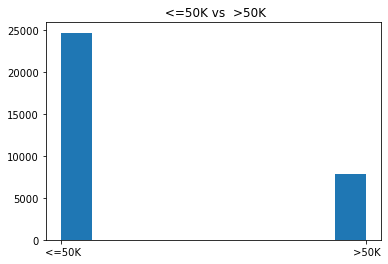

In [20]:
df['Income'].hist(grid=False)
plt.title(' <=50K vs  >50K')
plt.show()

In [21]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

its seems that data is imbalanved so we use SMOTE technique to balanced the data

In [22]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

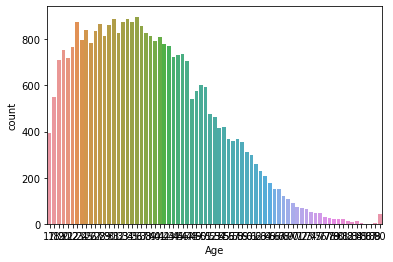

In [24]:
sns.countplot('Age',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

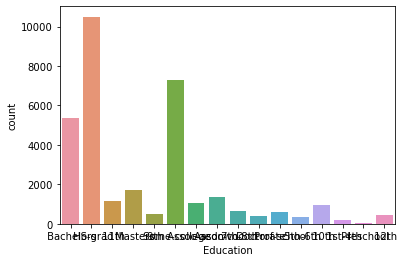

In [26]:
sns.countplot('Education',data=df)

<AxesSubplot:xlabel='Education_num', ylabel='count'>

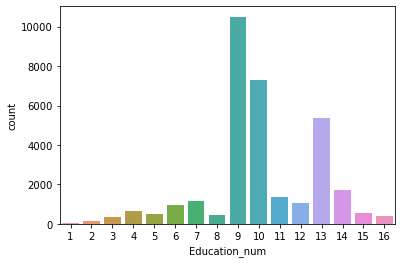

In [28]:
sns.countplot('Education_num',data=df)

we can see education and education_num columns are  having same data so we delete education column

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

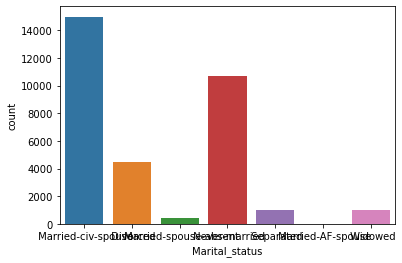

In [29]:
sns.countplot('Marital_status',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

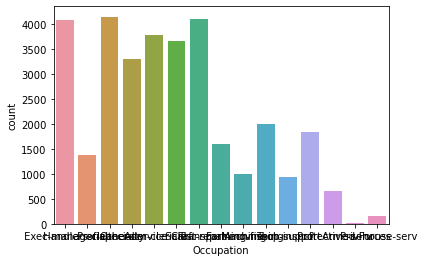

In [31]:
sns.countplot('Occupation',data=df)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

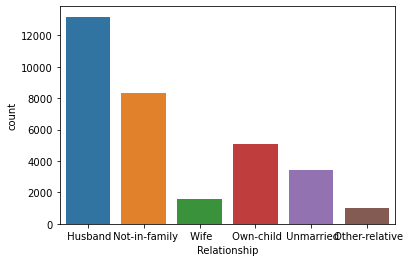

In [32]:
sns.countplot('Relationship',data=df)

<AxesSubplot:xlabel='Race', ylabel='count'>

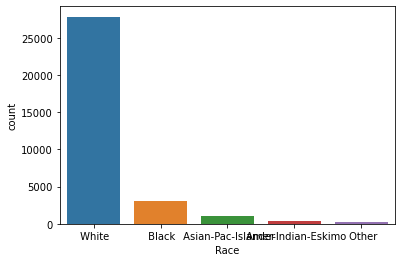

In [33]:
sns.countplot('Race',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

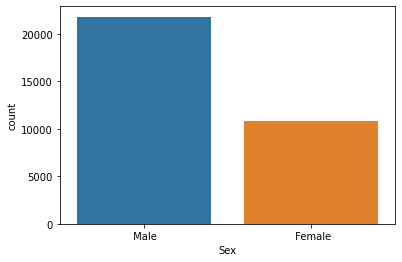

In [34]:
sns.countplot('Sex',data=df)

# dropping unwantd columns

In [40]:
df.drop(columns=['Education'],axis=1,inplace=True)

In [41]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
df.shape

(32560, 14)

# Transformation technique to encode the text columns 

In [43]:
from sklearn.preprocessing  import LabelEncoder
count=1
for col in df:
    if df[col].dtype==np.number:
        continue
    df[col]=LabelEncoder().fit_transform(df[col])
    
    

In [44]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,13,2,4,5,4,0,0,0,39,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,16527,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,8,6,1,4,4,0,0,0,39,39,0
32558,5,4,12880,8,4,1,3,4,1,0,0,19,39,0


In [45]:
df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,21.580313,3.868796,10498.253256,9.080590,2.611794,6.572912,1.446376,3.665848,0.669195,6.500645,2.053348,39.377948,36.718796,0.240817
std,13.635711,1.455879,6048.727241,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,23.300419,10.056712,12.144192,7.823892,0.427586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,5395.750000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,20.000000,4.000000,10347.500000,9.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,31.000000,4.000000,15486.250000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,72.000000,8.000000,21646.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,118.000000,91.000000,93.000000,41.000000,1.000000


now all the text columns are encoded 

# checking correlation

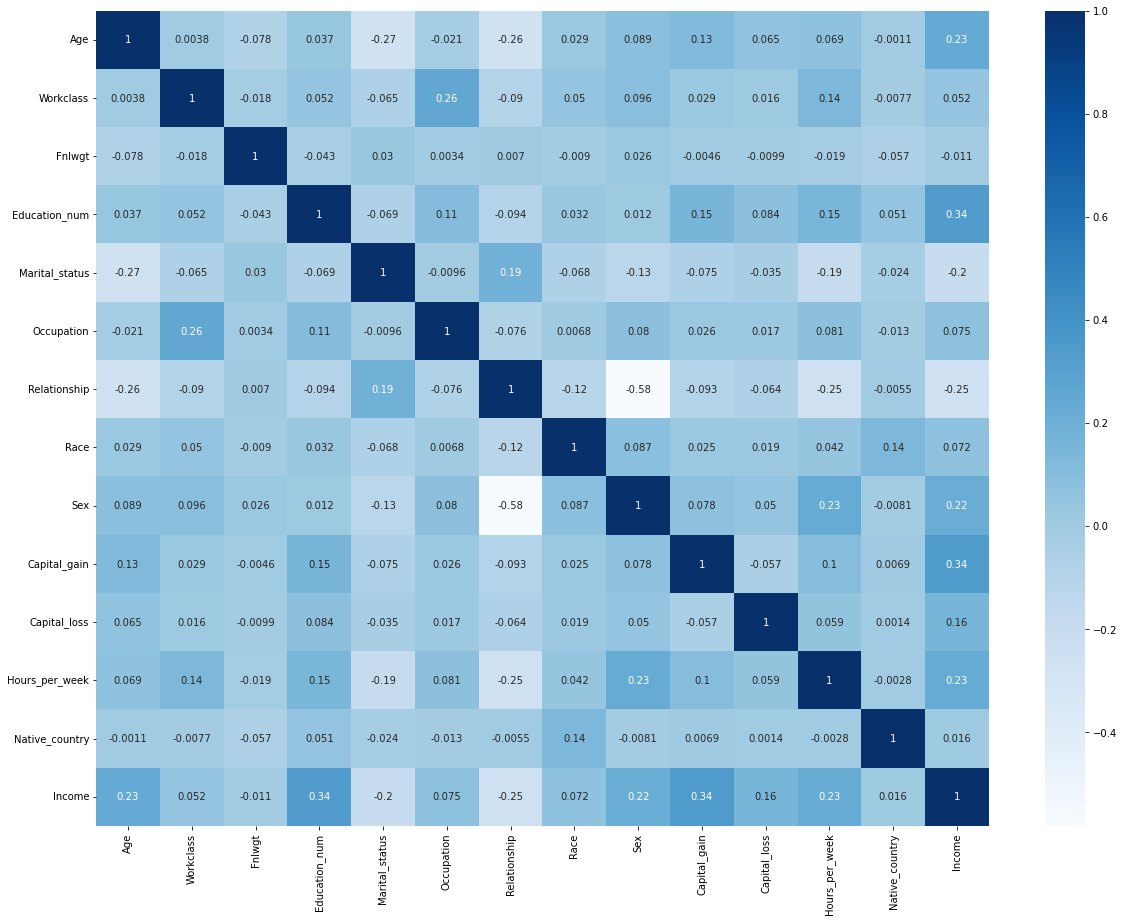

In [46]:
corr_mat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.show()

In [47]:
corr_mat['Income'].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.340034
Education_num     0.335182
Age               0.234136
Hours_per_week    0.232394
Sex               0.215995
Capital_loss      0.162511
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.010573
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Documentation :
    
    - marital status and relationship i negatively correlated so we can drop this columns

In [48]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,13,2,4,5,4,0,0,0,39,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,16527,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,8,6,1,4,4,0,0,0,39,39,0
32558,5,4,12880,8,4,1,3,4,1,0,0,19,39,0


# data preprocessing: 

# plotting distribution plot to check the data is normally distributed or not

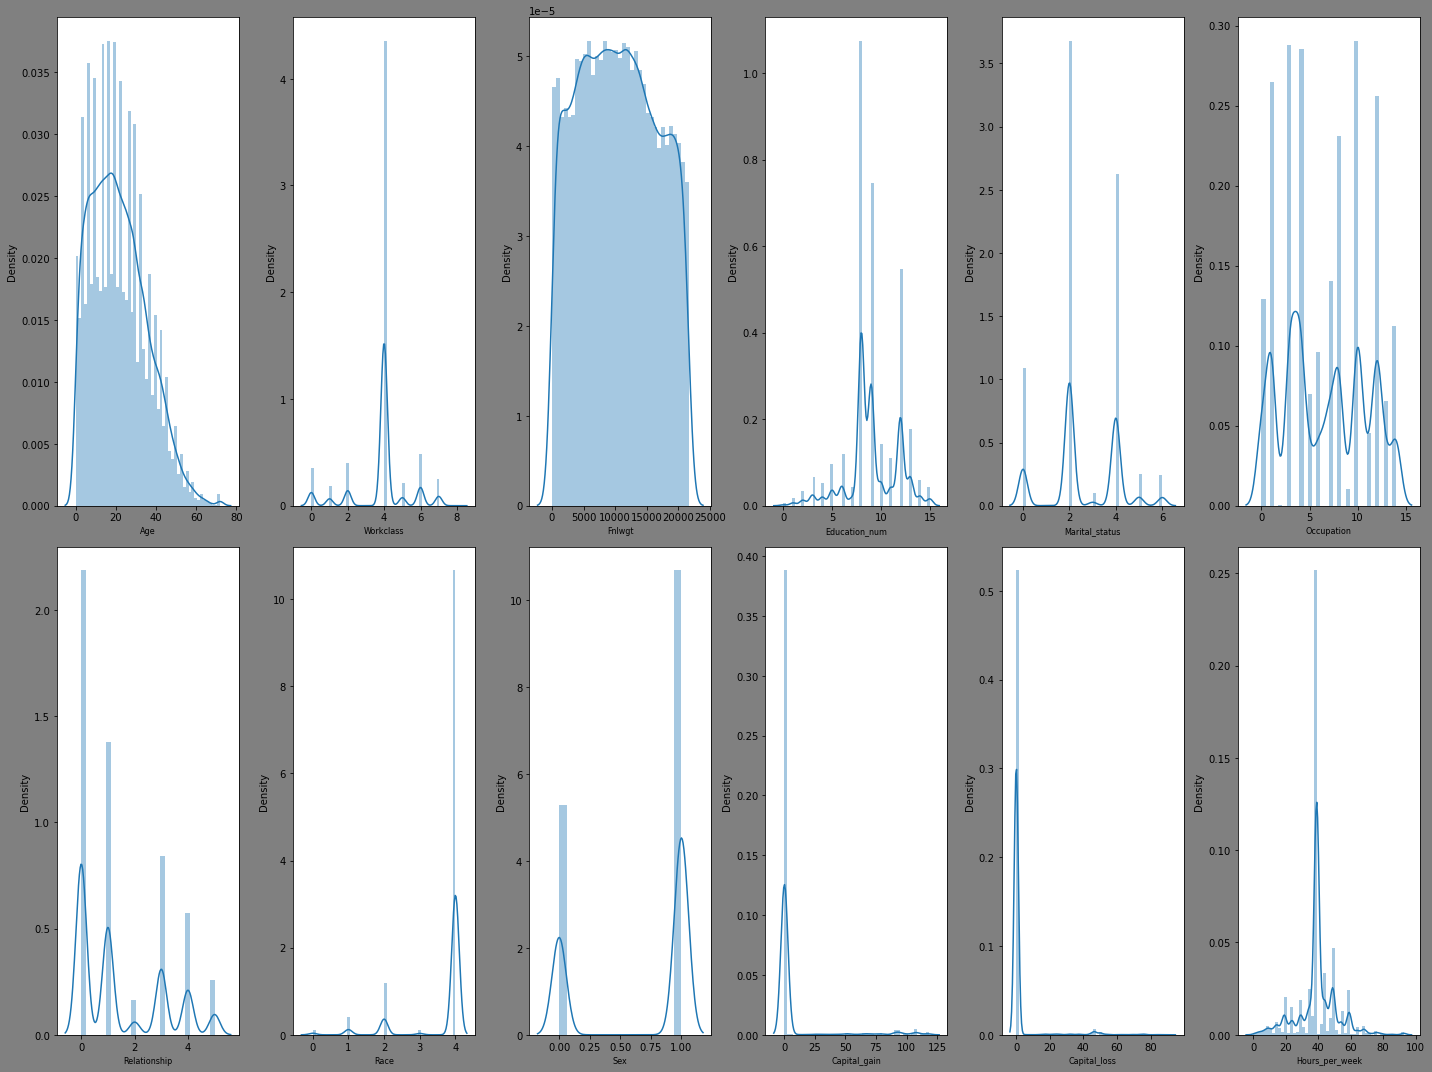

In [49]:
# checking wether te data is normally distributed or not!!!!!!!!!!!!
plt.figure(figsize=(20,15),facecolor='gray')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

this shows data is not normally distributed ,data is skewed and outliers is present 

# checking outliers by boxplot 

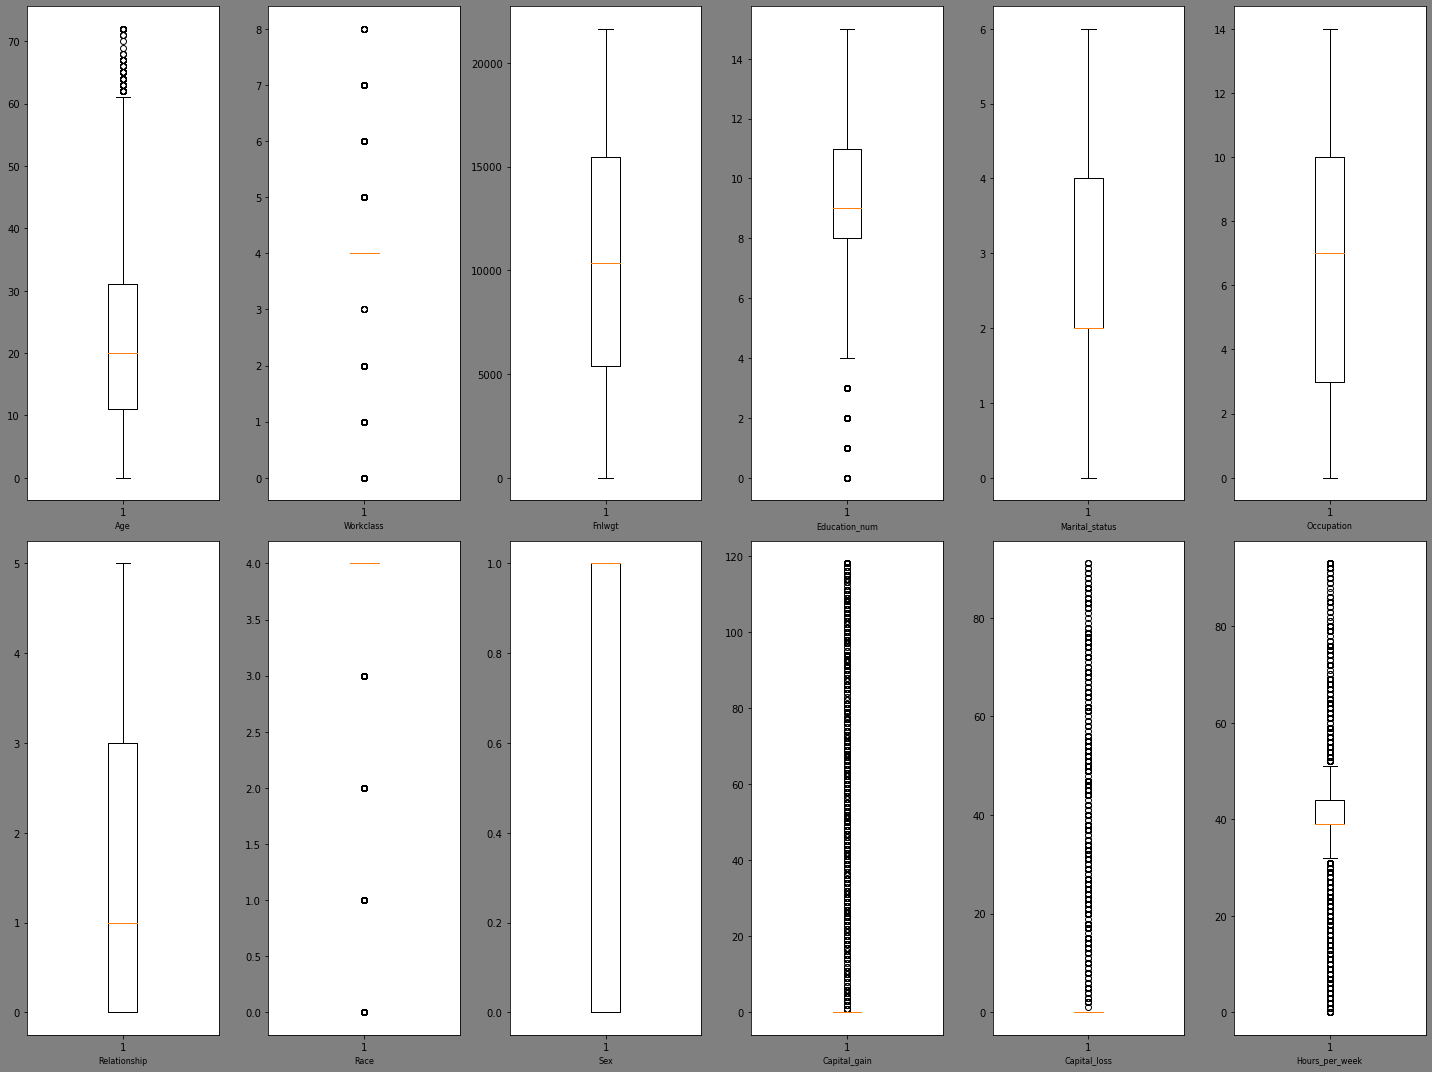

In [50]:
plt.figure(figsize=(20,15),facecolor='gray')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

documentation :
    
    outliers is present in almost in all the columns except sex ,fnlwgt and occupation columns

# removing outliers by zscore method

In [51]:
from scipy.stats import zscore

In [52]:
z=np.abs(zscore(df))
z

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.837497,1.463883,1.252060,1.134779,0.406183,0.608434,0.900177,0.393675,0.703087,0.278997,0.20418,2.254441,0.291573,0.563210
1,0.042559,0.090121,0.592985,0.420027,1.734026,0.135480,0.277810,0.393675,0.703087,0.278997,0.20418,0.031122,0.291573,0.563210
2,1.057511,0.090121,0.799643,1.197429,0.406183,0.135480,0.900177,1.962583,0.703087,0.278997,0.20418,0.031122,0.291573,0.563210
3,0.775939,0.090121,1.464090,1.134779,0.406183,0.810427,2.211658,1.962583,1.422298,0.278997,0.20418,0.031122,4.054157,0.563210
4,0.115897,0.090121,1.190475,1.523480,0.406183,0.608434,2.211658,0.393675,1.422298,0.278997,0.20418,0.031122,0.291573,0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849277,0.090121,0.996712,0.746077,0.406183,1.519858,2.211658,0.393675,1.422298,0.278997,0.20418,0.195813,0.291573,0.563210
32556,0.104117,0.090121,0.399967,0.420027,0.406183,0.100997,0.900177,0.393675,0.703087,0.278997,0.20418,0.031122,0.291573,1.775537
32557,1.424200,0.090121,0.432536,0.420027,2.249503,1.317864,1.589291,0.393675,1.422298,0.278997,0.20418,0.031122,0.291573,0.563210
32558,1.215967,0.090121,0.393766,0.420027,0.921660,1.317864,0.966924,0.393675,0.703087,0.278997,0.20418,1.678025,0.291573,0.563210


In [53]:
threshold=3
print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([12,  9,  9, ...,  7,  7,  9], dtype=int64))


In [54]:
df1=df[(z<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,6,2,6,0,2,1,0,0,39,39,0
4,20,4,17699,13,2,4,5,4,0,0,0,39,39,0
5,32,4,8535,4,3,8,1,2,0,0,0,15,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,5,4,18559,9,4,11,1,4,1,0,0,39,39,0
32555,10,4,16527,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,8,6,1,4,4,0,0,0,39,39,0


In [55]:
df1.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000
mean,20.769815,3.857528,10585.974864,8.973667,2.637629,6.523509,1.501066,3.783841,0.654348,1.617767,0.274023,38.670095,38.449635,0.190350
std,13.394953,1.448298,6051.187283,2.385474,1.537143,4.252288,1.598277,0.615193,0.475589,9.303481,2.526678,11.138166,2.779831,0.392584
min,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,14.000000,0.000000
25%,10.000000,4.000000,5475.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,19.000000,4.000000,10518.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,30.000000,4.000000,15561.500000,10.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,62.000000,8.000000,21646.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,76.000000,32.000000,75.000000,41.000000,1.000000


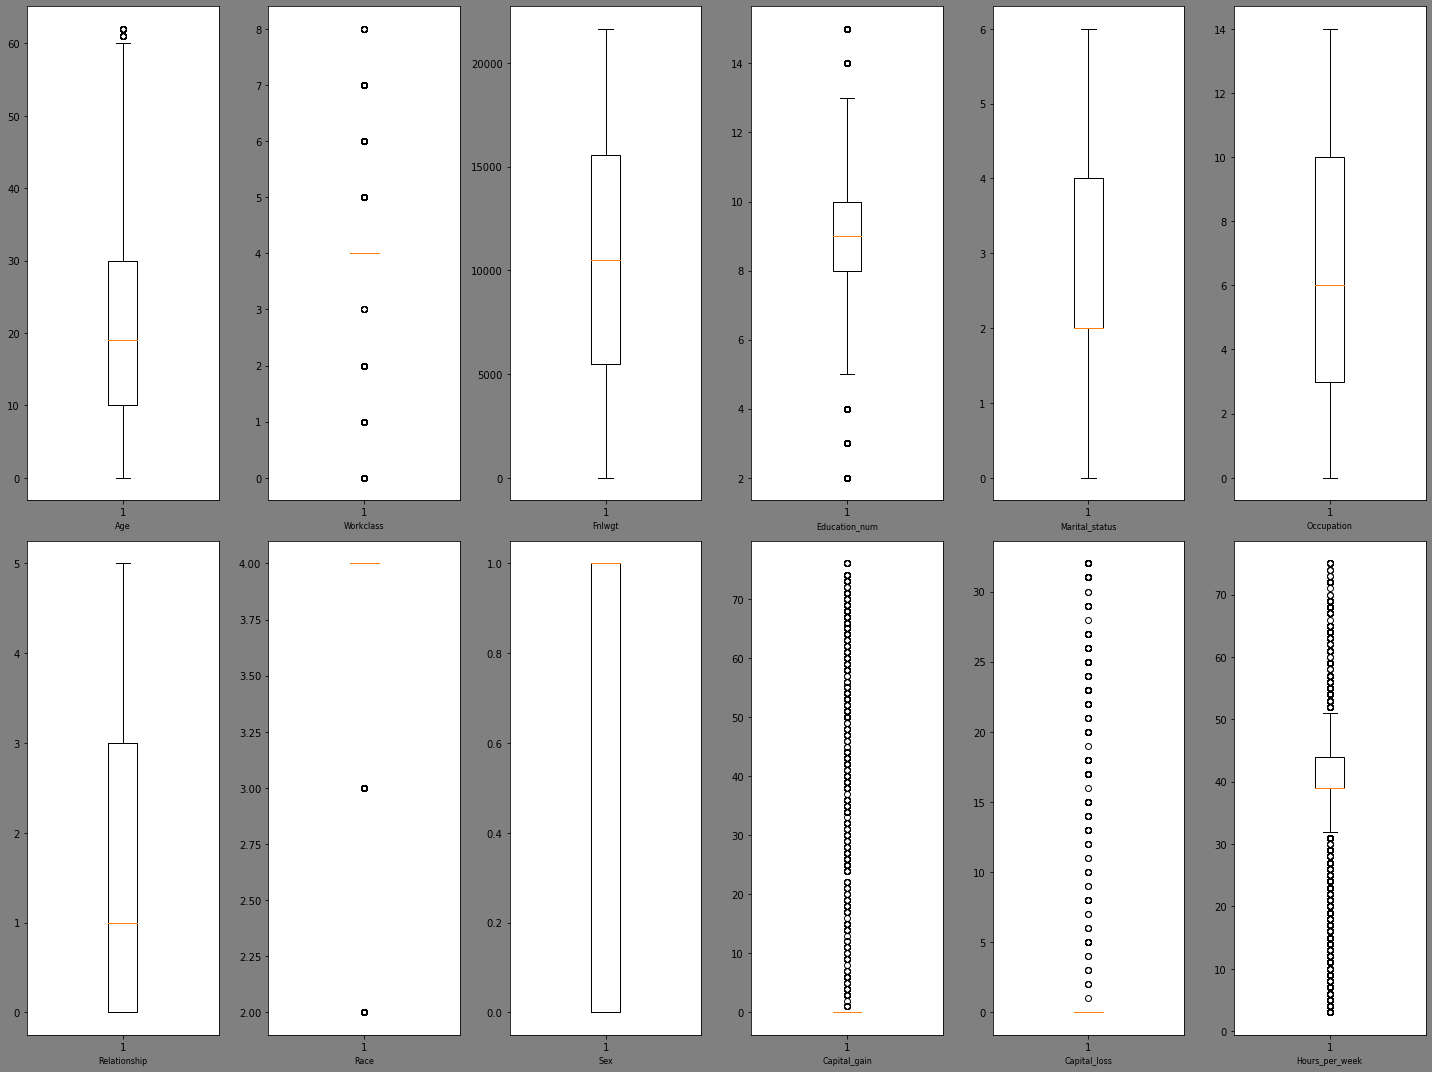

In [56]:
plt.figure(figsize=(20,15),facecolor='gray')
plotnumber=1

for column in df1:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        plt.boxplot(df1[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

 here we used zscore method to remove the outliers but the outliers is present 

still some outliers is present in some columns.

==============================================================================================================================

# Create independent and dependent variable

In [58]:
X=df1.drop('Income',axis=1)
y=df1.Income

In [65]:
X.shape

(26735, 13)

In [66]:
df1.shape

(26735, 14)

# checking skewness

In [67]:
X.skew().sort_values(ascending=False)

Capital_loss      9.786982
Capital_gain      6.044493
Relationship      0.709768
Age               0.512903
Occupation        0.136047
Fnlwgt            0.042344
Marital_status   -0.086741
Education_num    -0.150206
Hours_per_week   -0.382335
Sex              -0.649131
Workclass        -0.746686
Race             -2.524414
Native_country   -5.338005
dtype: float64

the skewness is very high so we can remove it by power transform method

# Using power_tranform method 

In [68]:
from sklearn.preprocessing import power_transform

In [69]:
x_new=power_transform(X)

In [70]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

10    8.542437
9     5.024051
12    0.548532
11    0.089866
6     0.085967
1     0.075043
3     0.034609
0    -0.116734
4    -0.144903
5    -0.182820
2    -0.266659
8    -0.649131
7    -2.466435
dtype: float64

In [71]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

Capital_loss      8.542437
Capital_gain      5.024051
Native_country    0.548532
Hours_per_week    0.089866
Relationship      0.085967
Workclass         0.075043
Education_num     0.034609
Age              -0.116734
Marital_status   -0.144903
Occupation       -0.182820
Fnlwgt           -0.266659
Sex              -0.649131
Race             -2.466435
dtype: float64

In [72]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

Capital_loss      8.542437
Capital_gain      5.024051
Native_country    0.548532
Hours_per_week    0.089866
Relationship      0.085967
Workclass         0.075043
Education_num     0.034609
Age              -0.116734
Marital_status   -0.144903
Occupation       -0.182820
Fnlwgt           -0.266659
Sex              -0.649131
Race             -2.466435
dtype: float64

In [73]:
x=pd.DataFrame(x_new,columns=X.columns)

In [74]:
x.skew().sort_values(ascending=False)

Capital_loss      8.542437
Capital_gain      5.024051
Native_country    0.548532
Hours_per_week    0.089866
Relationship      0.085967
Workclass         0.075043
Education_num     0.034609
Age              -0.116734
Marital_status   -0.144903
Occupation       -0.182820
Fnlwgt           -0.266659
Sex              -0.649131
Race             -2.466435
dtype: float64

In [75]:
sk=x.skew()

In [76]:
sk[np.abs(sk)>0.5]

Race             -2.466435
Sex              -0.649131
Capital_gain      5.024051
Capital_loss      8.542437
Native_country    0.548532
dtype: float64

In [77]:
x.skew()[np.abs(x.skew())<0.5].all()

True

we can see the skewness is still  present in the 5 columns so we can check with boccox method

# Boxcox Method

[]

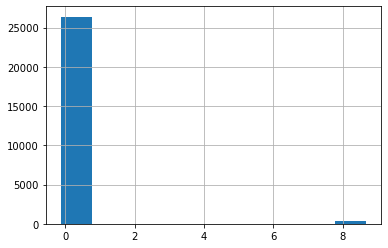

In [79]:
x['Capital_loss'].hist().plot()

In [80]:
from scipy.stats import boxcox

In [ ]:
x['Capital_loss']=boxcox(x['Capital_loss'],0)

Here we can see the BoxCOx requires the positive data and from graph we can see some of the part is in negative side

[]

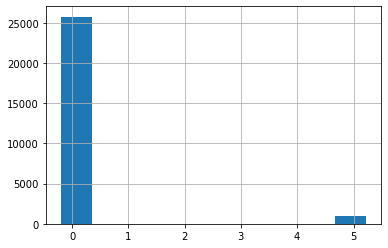

In [81]:
x['Capital_gain'].hist().plot()

Here we can see the BoxCOx requires the positive data and from graph we can see most of the part is in negative side

In [ ]:
x['Capital_gain']=boxcox(x['Capital_gain'],0)

[]

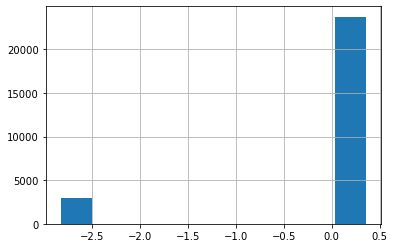

In [83]:
x['Race'].hist().plot()

In [ ]:
x['Race']=boxcox(x['Race'],0)

Here we can see the BoxCOx requires the positive data and from graph we can see most of the part is in negative side

[]

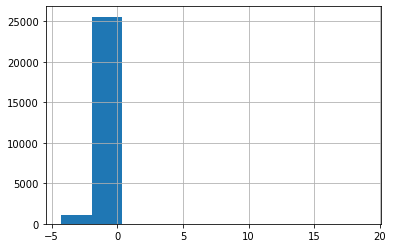

In [84]:
x['Native_country'].hist().plot()

In [ ]:
x['Native_country']=boxcox(x['Native_country'],0)

The skewness was removed by powertransform so we used Boxcox but the skewness is not removed 

# standardscaler(): to scaled the data in one form

In [85]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# USing Variance inflation Factor

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif.sort_values(by='vif',ascending=False)

,vif,feature
6,1.877666,Relationship
8,1.609273,Sex
0,1.283159,Age
4,1.178894,Marital_status
11,1.147906,Hours_per_week
5,1.091990,Occupation
1,1.089731,Workclass
3,1.068675,Education_num
7,1.052490,Race
2,1.028213,Fnlwgt


there is no multicollinearity exist so we cannot drop any column 

# checking unbalanced data

In [87]:
df1.Income.value_counts()

0    21646
1     5089
Name: Income, dtype: int64

data is imbalanced so we used SMOTE technique

# SMOTE technique

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smt=SMOTE()

In [90]:
trainx,trainy=smt.fit_resample(x,y)

In [91]:
trainx.value_counts()

Age        Workclass  Fnlwgt     Education_num  Marital_status  Occupation  Relationship  Race       Sex        Capital_gain  Capital_loss  Hours_per_week  Native_country
 0.447404  0.022040    0.482583  -0.012984      -0.400318        0.837887   -1.134474      0.354516   0.726800  -0.191736     -0.115507     -0.018301       0.17674           3
 0.247463  0.022040   -0.515874   1.290414      -0.400318       -0.752557   -1.134474      0.354516   0.726800  -0.191736     -0.115507     -0.018301       0.17674           2
 0.874611  0.022040   -1.969092  -2.371727      -0.400318       -0.752557   -1.134474      0.354516   0.726800  -0.191736     -0.115507     -0.018301       0.17674           2
-1.737960  0.022040   -0.405588  -0.012984       0.885537       -0.480194    1.053153     -2.824259   0.726800  -0.191736     -0.115507     -0.905947       0.17674           2
 0.874611  1.660919   -1.722570  -0.012984      -0.400318       -0.752557   -1.134474      0.354516   0.726800  -0.191736    

In [92]:
trainy.value_counts()

0    21646
1    21646
Name: Income, dtype: int64

In [93]:
X=trainx
y=trainy

In [94]:
X.shape

(43292, 13)

In [95]:
y.shape

(43292,)

now the data is balanced so we can proceed ahead

# Model selection 

In [96]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB()
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Using LOGISTIC REGRESSION

# to calculate the best test _size for logistic regression

In [97]:
# to calculate the best test_size
maxAcc=0
maxRS=0

for i in range(9,40):
    i1=i*0.01
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('accuracy',maxAcc,'random_state',i)
print("best_accuracy is ",maxAcc*100,'random_state',maxRS)      

accuracy 0.7777777777777778 random_state 9
accuracy 1.0 random_state 10
best_accuracy is  100.0 random_state 10


In [98]:
# finding the best random state 
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.10,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7505773672055427 Random state 1
accuracy 0.7672055427251732 Random state 2
accuracy 0.7702078521939953 Random state 21
accuracy 0.7706697459584295 Random state 23
accuracy 0.7759815242494227 Random state 25
accuracy 0.7799076212471132 Random state 207
Best accuracy is 77.99076212471132 on Random state 207


In [99]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.10,random_state=207)
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 77.99076212471132
[[157900  52800]
 [ 42500 179800]]


#Logistic regression giving 78% accuracy 

===============================================================================================================================

# DecisionTreeClassifier algorithm

In [100]:
# to calculate the best test_size
maxAcc=0
maxRS=0

for i in range(9,40):
    i1=i*0.01
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('accuracy',maxAcc,'random_state',i)
print("best_accuracy is ",maxAcc*100,'random_state',maxRS)      

accuracy 0.7777777777777778 random_state 9
accuracy 0.9090909090909091 random_state 11
accuracy 0.9166666666666666 random_state 12
accuracy 0.9230769230769231 random_state 13
accuracy 0.9285714285714286 random_state 14
accuracy 0.9333333333333333 random_state 15
accuracy 0.9411764705882353 random_state 17
accuracy 1.0 random_state 18
best_accuracy is  100.0 random_state 18


In [101]:
# finding the best random state 
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.18,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8543564737585012 Random state 1
accuracy 0.8628256127293725 Random state 2
accuracy 0.8652636981906839 Random state 12
accuracy 0.8662902604901835 Random state 26
accuracy 0.867573463364558 Random state 30
accuracy 0.8679584242268703 Random state 145
accuracy 0.86847170537662 Random state 146
accuracy 0.8691133068138073 Random state 197
accuracy 0.8696265879635571 Random state 301
Best accuracy is 86.96265879635571 on Random state 301


In [102]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.18,random_state=301)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100) 

Accuracy 86.98832285384319
[[333700  51300]
 [ 50100 344200]]


DecisionTreeClassifier algorithm is giving 86.98% accuracy

=============================================================================================================================

# Random Forest classifier algorithm

In [103]:
# to calculate the best test_size
maxAcc=0
maxRS=0

for i in range(9,40):
    i1=i*0.01
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('accuracy',maxAcc,'random_state',i)
print("best_accuracy is ",maxAcc*100,'random_state',maxRS)      

accuracy 0.8888888888888888 random_state 9
accuracy 0.9 random_state 10
accuracy 0.9090909090909091 random_state 11
accuracy 1.0 random_state 12
best_accuracy is  100.0 random_state 12


In [104]:
# finding the best random state 
maxAcc = 0
maxRs=0

for i in range(1,50):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.12,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8997305619707467 Random state 1
accuracy 0.9114703618167821 Random state 2
accuracy 0.9164742109314857 Random state 12
accuracy 0.9182063125481139 Random state 40
Best accuracy is 91.82063125481139 on Random state 40


In [105]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.12,random_state=40)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100) 

Accuracy 91.85912240184757
[[233400  26500]
 [ 15800 243900]]


 Random forest is giving 91.85% accuracy

==============================================================================================================================

# KNeighborsClassifier algorithm

In [106]:
# to calculate the best test_size
maxAcc=0
maxRS=0

for i in range(9,40):
    i1=i*0.01
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('accuracy',maxAcc,'random_state',i)
print("best_accuracy is ",maxAcc*100,'random_state',maxRS)      

accuracy 0.8888888888888888 random_state 9
accuracy 0.9 random_state 10
accuracy 0.9090909090909091 random_state 11
accuracy 0.9166666666666666 random_state 12
accuracy 1.0 random_state 16
best_accuracy is  100.0 random_state 16


In [ ]:
# finding the best random state 
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.16,random_state=i)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

In [108]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.16,random_state=15)
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100) 

Accuracy 87.05067128627111
[[264800  75400]
 [ 14300 338200]]


# knn is giving 87.05%accuracy

==========================================================================================================================

# random forest clssirief is giving better accuracy among all algorithms

# Using  cross validation score :

In [109]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.7626353004687685


In [110]:
#checking for desicionTereeClassifier
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8534164464641425


In [111]:
#checking for randomforest
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.9015540774635358


In [112]:
#checking for knc
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knc,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8621919208823007


# so random forest is giving highest validation score so we use Random FC to trained the model

# Using Hyperparameter tunning

In [113]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }

grd=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')

grd.fit(x_train,y_train)

print('best_params:',grd.best_params_)

clf=grd.best_estimator_

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)

print(rf_conf_mat)

print(accuracy_score(y_test,y_pred))


best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2'}
[[2813  589]
 [ 233 3292]]
0.8813339107838891


In [114]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.12,random_state=40) 
rf_final=RandomForestClassifier(criterion= 'gini', max_depth= 15, max_features= 'log2')
rf_final.fit(x_train,y_train)
pred=rf_final.predict(x_test)
acc=rf_final.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 89.22247882986913
[[217100  42800]
 [ 13200 246500]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2599
           1       0.85      0.95      0.90      2597

    accuracy                           0.89      5196
   macro avg       0.90      0.89      0.89      5196
weighted avg       0.90      0.89      0.89      5196
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2599
           1       0.85      0.95      0.90      2597

    accuracy                           0.89      5196
   macro avg       0.90      0.89      0.89      5196
weighted avg       0.90      0.89      0.89      5196
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2599
           1       0.85      0.95      0.90      2597

    accuracy                           0.89      5196
   macro avg       0.90      0.89      0.89      5196
weighted avg  

by using hyperparamter tunning the accuracy is89.22%

# plot the ROC corve

In [117]:
y_pred=rf.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

In [119]:
fpr,tpr,thresholds

(array([0.        , 0.93916057, 1.        ]),
 array([0.        , 0.10196229, 1.        ]),
 array([2, 1, 0]))

In [120]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.93916057 1.        ]
True positive rate [0.         0.10196229 1.        ]


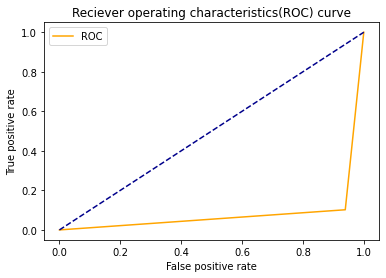

In [121]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()

# AUC score

In [122]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

91.85991383493223


# Classification Report

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2599
           1       0.90      0.94      0.92      2597

    accuracy                           0.92      5196
   macro avg       0.92      0.92      0.92      5196
weighted avg       0.92      0.92      0.92      5196



# saving the model in pickel format

In [125]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"census")

['census']

# Testing Model with Future Data for output

In [126]:
X.iloc[0]

Age               0.931927
Workclass         1.660919
Fnlwgt           -1.292296
Education_num     1.290414
Marital_status   -0.400318
Occupation       -0.480194
Relationship     -1.134474
Race              0.354516
Sex               0.726800
Capital_gain     -0.191736
Capital_loss     -0.115507
Hours_per_week   -2.192978
Native_country    0.176740
Name: 0, dtype: float64

In [127]:
y.iloc[0]

0

we will take exist data as sample data to compare predict output

In [129]:
t=np.array([0.931927,1.660919,-1.292296,1.290414,-0.400318,-0.480194,-1.134474,0.354516,0.726800,-0.191736,-0.115507,-2.192978,0.176740])

In [130]:
t.shape

(13,)

In [131]:
x_train.shape

(38096, 13)

In [132]:
t=t.reshape(1,-1)
t.shape

(1, 13)

In [133]:
rf.predict(t)

array([0])

The predicted Output for Income is matching with Actual otput and predicted output

​

==============================================================================================================================